In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

In [2]:
# Read in provider table

data = pd.read_csv('../../../processed_data/provider_final.csv',index_col='Provider')
data.drop('Unnamed: 0', axis=1, inplace=True)
print(data.shape)
data.sample(5)

(5410, 46)


,PotentialFraud,DurationMedianIP,DurationMeanIP,DurationMedianOP,DurationMeanOP,Serves,ChronCondsMedian,ChronCondsMean,ChronConsMode,PtAgeMedian,PtAgeMean,NumPtsIP,NumPtsOP,NumStatesIP,NumStatesOP,SharePhysician,MergeAvgClaimReimbursed,NumTopCodeClaim,DupClaimNum_IP,DupClaimRatio_IP,DupClaim_IP,DupClaimStatesNum_IP,DupClaimMultiState_IP,DupClaimProviderNum_IP,DupClaimMultiProvider_IP,DupClaimStartDtNum_IP,DupClaimMultiStartDt_IP,DupClaimNum_OP,DupClaimRatio_OP,DupClaim_OP,DupClaimStatesNum_OP,DupClaimMultiState_OP,DupClaimProviderNum_OP,DupClaimMultiProvider_OP,DupClaimStartDtNum_OP,DupClaimMultiStartDt_OP,AvgDuration,NumOfPt,NumOfClm,ClmPerPt,TotalRev,RevPerPt,ClmNoPhy,ClmAllPhy,ClmNoProc,ClmPerDt
Provider,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PRV54849,No,0.0,0.00,0.0,0.000000,OP,6.5,6.666667,7.0,70.0,71.583333,0.0,12.0,0.0,3.0,1.0,132.500000,0.0,0.0,0.0,no,0.0,no,0.0,no,0.0,no,6.0,0.500000,yes,52.0,yes,2364.0,yes,371.0,yes,0.00,12,12,1.00,1590,132.50,1,1,12,1.00
PRV51952,No,0.0,0.00,0.0,2.105263,OP,7.0,7.052632,7.5,75.0,73.526316,0.0,19.0,0.0,2.0,1.0,130.000000,2.0,0.0,0.0,no,0.0,no,0.0,no,0.0,no,10.0,0.526316,yes,52.0,yes,2389.0,yes,371.0,yes,2.11,19,19,1.00,2730,143.68,0,2,19,1.06
PRV54130,No,0.0,0.00,0.0,1.359375,OP,5.5,6.312500,5.0,73.0,74.109375,0.0,36.0,0.0,2.0,1.0,143.906250,1.0,0.0,0.0,no,0.0,no,0.0,no,0.0,no,25.0,0.390625,yes,52.0,yes,1950.0,yes,368.0,yes,1.36,36,64,1.78,9430,261.94,0,7,64,1.12
PRV52407,No,0.0,0.00,0.0,0.534884,OP,7.0,7.069767,4.0,70.0,72.558140,0.0,18.0,0.0,1.0,1.0,371.395349,3.0,0.0,0.0,no,0.0,no,0.0,no,0.0,no,15.0,0.348837,yes,52.0,yes,2625.0,yes,372.0,yes,0.53,18,43,2.39,16380,910.00,0,4,43,1.05
PRV55149,No,4.0,5.75,0.0,0.000000,IP,5.5,5.437500,4.5,81.0,76.687500,16.0,0.0,1.0,0.0,1.0,9062.500000,6.0,0.0,0.0,no,0.0,no,0.0,no,0.0,no,0.0,0.000000,no,0.0,no,0.0,no,0.0,no,5.75,16,16,1.00,162088,10130.50,0,0,9,1.00


In [3]:
# Make dummies

encode_cols = data[~data.applymap(np.isreal)].dropna(axis=1).columns.to_list()
print(encode_cols)

data[encode_cols[2:]] = data[encode_cols[2:]].applymap(lambda x: 1 if x.lower() == 'yes' else 0)
dummies = pd.get_dummies(data['Serves'],prefix='Serves_',drop_first=True)

data_dum = pd.concat([data.drop('Serves',axis=1),dummies],axis=1)

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

['PotentialFraud', 'Serves', 'DupClaim_IP', 'DupClaimMultiState_IP', 'DupClaimMultiProvider_IP', 'DupClaimMultiStartDt_IP', 'DupClaim_OP', 'DupClaimMultiState_OP', 'DupClaimMultiProvider_OP', 'DupClaimMultiStartDt_OP']


In [4]:
print(data_dum.shape)
data_dum.head()

(5410, 47)


,PotentialFraud,DurationMedianIP,DurationMeanIP,DurationMedianOP,DurationMeanOP,ChronCondsMedian,ChronCondsMean,ChronConsMode,PtAgeMedian,PtAgeMean,NumPtsIP,NumPtsOP,NumStatesIP,NumStatesOP,SharePhysician,MergeAvgClaimReimbursed,NumTopCodeClaim,DupClaimNum_IP,DupClaimRatio_IP,DupClaim_IP,DupClaimStatesNum_IP,DupClaimMultiState_IP,DupClaimProviderNum_IP,DupClaimMultiProvider_IP,DupClaimStartDtNum_IP,DupClaimMultiStartDt_IP,DupClaimNum_OP,DupClaimRatio_OP,DupClaim_OP,DupClaimStatesNum_OP,DupClaimMultiState_OP,DupClaimProviderNum_OP,DupClaimMultiProvider_OP,DupClaimStartDtNum_OP,DupClaimMultiStartDt_OP,AvgDuration,NumOfPt,NumOfClm,ClmPerPt,TotalRev,RevPerPt,ClmNoPhy,ClmAllPhy,ClmNoProc,ClmPerDt,Serves__IP,Serves__OP
Provider,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PRV51001,No,4.0,5.000000,0.0,0.550000,6.0,5.760000,5.0,79.0,77.880000,5.0,19.0,1.0,1.0,1.0,4185.600000,5.0,0.0,0.000000,0,0.0,0,0.0,0,0.0,0,11.0,0.550000,1,50.0,1,422.0,1,278.0,1,1.44,24,25,1.04,109980,4582.50,0,2,23,1.09,0,0
PRV51003,Yes,4.0,5.161290,0.0,2.357143,7.0,6.674242,6.0,71.0,69.083333,53.0,66.0,3.0,3.0,1.0,4588.409091,25.0,1.0,0.016129,1,2.0,1,2.0,1,2.0,1,25.0,0.357143,1,52.0,1,1351.0,1,372.0,1,3.67,117,132,1.13,671956,5743.21,0,4,93,1.19,0,0
PRV51004,No,0.0,0.000000,0.0,1.429530,7.0,6.812081,8.0,72.0,71.261745,0.0,138.0,0.0,9.0,1.0,350.134228,5.0,0.0,0.000000,0,0.0,0,0.0,0,0.0,0,72.0,0.483221,1,52.0,1,3006.0,1,375.0,1,1.43,138,149,1.08,52480,380.29,0,12,149,1.27,0,1
PRV51005,Yes,0.0,0.000000,0.0,1.088412,7.0,6.886695,5.0,70.0,69.526180,0.0,495.0,0.0,4.0,1.0,241.124464,25.0,0.0,0.000000,0,0.0,0,0.0,0,0.0,0,530.0,0.454936,1,52.0,1,3920.0,1,382.0,1,1.09,495,1165,2.35,284610,574.97,2,98,1165,3.27,0,1
PRV51007,No,5.0,5.333333,0.0,0.768116,7.0,6.986111,6.0,69.5,68.305556,3.0,56.0,1.0,2.0,1.0,468.194444,3.0,0.0,0.000000,0,0.0,0,0.0,0,0.0,0,29.0,0.420290,1,52.0,1,1816.0,1,371.0,1,0.96,58,72,1.24,36974,637.48,0,8,71,1.06,0,0


In [5]:
# Drop Means

# data_dum.drop(['DurationMeanIP',
#                'DurationMeanOP',
#                'ChronCondsMean',
#                'PtAgeMean'], axis=1, inplace=True)

In [6]:
# Drop Medians

# data_dum.drop(['DurationMedianIP',
#                'DurationMedianOP',
#                'ChronCondsMedian',
#                'PtAgeMedian'], axis=1, inplace=True)

In [7]:
# Drop Duration Mean IP

# data_dum.drop(['DurationMeanIP'], axis=1, inplace=True)

In [8]:
# Drop Duration Median IP

data_dum.drop(['DurationMedianIP'], axis=1, inplace=True)

# Logistic Regression

In [9]:
# Make target and features, and tt-split

data_dum2 = data_dum.copy()
data_dum2['PotentialFraud'] = np.where(data_dum2['PotentialFraud']=='Yes', 1, 0)

y = data_dum2.iloc[:, 0]
X = data_dum2.iloc[:, 1:]

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [10]:
print(ytrain.mean())
ytest.mean()

0.09347768682334301


0.09365372766481823

In [11]:
# Standardizing

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(Xtrain)
Xstrain = ss.transform(Xtrain)

## Based on F1 Score

In [12]:
# Instantiate model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced')

In [13]:
# Gridsearch

from sklearn.model_selection import GridSearchCV

grid_logreg = {'penalty':['l1'], 
              'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_logreg = GridSearchCV(logreg, grid_logreg, scoring='f1', cv=5, n_jobs=-1)
%time grid_search_logreg.fit(Xstrain, ytrain)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 2.28 s, sys: 73 ms, total: 2.35 s
Wall time: 10.8 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [14]:
# grid_search_logreg.cv_results_

In [15]:
# Score

print('Best Parameters:\t'+ str(grid_search_logreg.best_params_))
print('Best F1   Score:\t%.4f' %grid_search_logreg.best_score_)
print("Train error:\t\t%.5f" % (1 - grid_search_logreg.best_estimator_.score(Xstrain, ytrain)))

from sklearn.metrics import confusion_matrix

print('\nConfusion Matrix:')
print(confusion_matrix(ytrain, grid_search_logreg.best_estimator_.predict(Xstrain)))

Best Parameters:	{'C': 10, 'penalty': 'l1'}
Best F1   Score:	0.5542
Train error:		0.12200

Confusion Matrix:
[[3019  414]
 [  48  306]]


In [16]:
cm = confusion_matrix(ytrain, grid_search_logreg.best_estimator_.predict(Xstrain))

print('\nRecall:')
print(cm[1][1] / (cm[1][1]+cm[1][0]))
print('\nPrecision:')
print(cm[1][1] / (cm[1][1]+cm[0][1]))
print('\nAccuracy:')
print((cm[0][0]+cm[1][1]) / (cm[0][1]+cm[1][0]+cm[0][0]+cm[1][1]))


Recall:
0.864406779661017

Precision:
0.425

Accuracy:
0.878003696857671


In [18]:
labels = np.unique(ytrain)
cm = confusion_matrix(ytrain, grid_search_logreg.best_estimator_.predict(Xtrain), labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
display(cm_df)

,0,1
0,0,3433
1,0,354


In [19]:
# Feature Importance

f1_coef = pd.DataFrame(grid_search_logreg.best_estimator_.coef_.flatten(), index = Xtrain.columns, columns = ['coefficient']).sort_values(by = 'coefficient', ascending = False)
f1_coef_abs = pd.DataFrame({'abs_coef':abs(grid_search_logreg.best_estimator_.coef_.flatten()), 'coef': grid_search_logreg.best_estimator_.coef_.flatten()}, index = Xtrain.columns).sort_values(by = 'abs_coef', ascending = False)
f1_coef_imp = f1_coef_abs[f1_coef_abs['abs_coef']>0]

print(f"number of predictors before Lasso:", f1_coef_abs.shape[0])
print(f"number of predictors after Lasso:", f1_coef_imp.shape[0])

display(f1_coef_abs)

number of predictors before Lasso: 45
number of predictors after Lasso: 42


,abs_coef,coef
DupClaimStartDtNum_IP,5.441705,-5.441705
TotalRev,4.722907,4.722907
NumPtsIP,3.556059,-3.556059
DupClaimNum_IP,2.964137,2.964137
NumPtsOP,2.583957,-2.583957
DupClaimProviderNum_IP,1.630649,1.630649
NumOfClm,1.321784,1.321784
ClmPerDt,1.014967,1.014967
DupClaimStatesNum_OP,0.933800,0.933800
NumTopCodeClaim,0.925464,0.925464


[Text(0.5, 0, 'Coefficients'),
 Text(0.5, 1.0, 'Top 20 Significant Predictors by Selected by F1')]

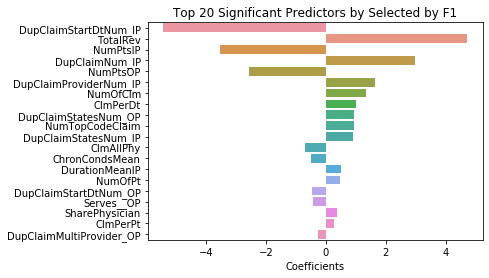

In [20]:
# Plot of Most Significant Coefs

plot_df = f1_coef_imp.iloc[:20, ]

ax = sns.barplot(y = plot_df.index, x = "coef", data = plot_df)
ax.set(xlabel = "Coefficients", title = "Top 20 Significant Predictors by Selected by F1")

# plt.savefig("../output/lasso_coef_imp_top20.png", bbox_inches = "tight")

## Based on roc_auc Score

In [21]:
# Instantiate model

from sklearn.linear_model import LogisticRegression

logreg2 = LogisticRegression(class_weight='balanced')

In [22]:
# Gridsearch

from sklearn.model_selection import GridSearchCV

grid_logreg2 = {'penalty':['l1'], 
              'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_logreg2 = GridSearchCV(logreg2, grid_logreg2, scoring='roc_auc', cv=5, n_jobs=-1)
%time grid_search_logreg2.fit(Xstrain, ytrain)

CPU times: user 193 ms, sys: 8.11 ms, total: 201 ms
Wall time: 13.5 s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [23]:
# grid_search_logreg.cv_results_

In [24]:
# Score

print('Best Parameters:\t'+ str(grid_search_logreg2.best_params_))
print('Best roc_auc Score:\t%.4f' %grid_search_logreg2.best_score_)
print("Train error:\t\t%.5f" % (1 - grid_search_logreg2.best_estimator_.score(Xstrain, ytrain)))

from sklearn.metrics import confusion_matrix

print('\nConfusion Matrix:')
print(confusion_matrix(ytrain, grid_search_logreg2.best_estimator_.predict(Xstrain)))

Best Parameters:	{'C': 0.1, 'penalty': 'l1'}
Best roc_auc Score:	0.9375
Train error:		0.13441

Confusion Matrix:
[[2968  465]
 [  44  310]]


In [25]:
cm = confusion_matrix(ytrain, grid_search_logreg2.best_estimator_.predict(Xstrain))

print('\nRecall:')
print(cm[1][1] / (cm[1][1]+cm[1][0]))
print('\nPrecision:')
print(cm[1][1] / (cm[1][1]+cm[0][1]))
print('\nAccuracy:')
print((cm[0][0]+cm[1][1]) / (cm[0][1]+cm[1][0]+cm[0][0]+cm[1][1]))


Recall:
0.8757062146892656

Precision:
0.4

Accuracy:
0.8655928175336678


In [27]:
# Feature Importance

roc_coef = pd.DataFrame(grid_search_logreg2.best_estimator_.coef_.flatten(), index = Xtrain.columns, columns = ['coefficient']).sort_values(by = 'coefficient', ascending = False)
roc_coef_abs = pd.DataFrame({'abs_coef':abs(grid_search_logreg2.best_estimator_.coef_.flatten()), 'coef': grid_search_logreg2.best_estimator_.coef_.flatten()}, index = Xtrain.columns).sort_values(by = 'abs_coef', ascending = False)
roc_coef_imp = roc_coef_abs[roc_coef_abs['abs_coef']>0]

print(f"number of predictors before Lasso:", roc_coef_abs.shape[0])
print(f"number of predictors after Lasso:", roc_coef_imp.shape[0])

display(roc_coef_abs)

number of predictors before Lasso: 45
number of predictors after Lasso: 20


,abs_coef,coef
TotalRev,1.587806,1.587806
DurationMeanIP,0.637480,0.637480
NumOfPt,0.581180,-0.581180
DupClaimNum_OP,0.539847,0.539847
ClmPerDt,0.427272,0.427272
RevPerPt,0.386531,0.386531
ClmPerPt,0.376567,0.376567
DupClaimStartDtNum_IP,0.313873,-0.313873
DupClaim_IP,0.249157,0.249157
ChronCondsMean,0.247113,-0.247113


[Text(0.5, 0, 'Coefficients'),
 Text(0.5, 1.0, 'Top 20 Significant Predictors by Selected by ROC_AUC')]

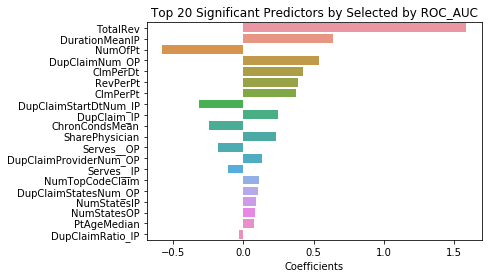

In [28]:
# Plot of Most Significant Coefs

plot_df = roc_coef_imp.iloc[:20, ]

ax = sns.barplot(y = plot_df.index, x = "coef", data = plot_df)
ax.set(xlabel = "Coefficients", title = "Top 20 Significant Predictors by Selected by ROC_AUC")

# plt.savefig("../output/lasso_coef_imp_top20.png", bbox_inches = "tight")

## Based on Recall Score

In [29]:
# Instantiate model

from sklearn.linear_model import LogisticRegression

logreg3 = LogisticRegression(class_weight='balanced')

In [30]:
# Gridsearch

from sklearn.model_selection import GridSearchCV

grid_logreg3 = {'penalty':['l1'], 
              'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_logreg3 = GridSearchCV(logreg3, grid_logreg3, scoring='recall', cv=5, n_jobs=-1)
%time grid_search_logreg3.fit(Xstrain, ytrain)

CPU times: user 85 ms, sys: 8.99 ms, total: 94 ms
Wall time: 13.4 s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [31]:
# grid_search_logreg.cv_results_

In [32]:
# Score

print('Best Parameters:\t'+ str(grid_search_logreg3.best_params_))
print('Best Recall Score:\t%.4f' %grid_search_logreg3.best_score_)
print("Train error:\t\t%.5f" % (1 - grid_search_logreg3.best_estimator_.score(Xstrain, ytrain)))

from sklearn.metrics import confusion_matrix

print('\nConfusion Matrix:')
print(confusion_matrix(ytrain, grid_search_logreg3.best_estimator_.predict(Xstrain)))

Best Parameters:	{'C': 0.01, 'penalty': 'l1'}
Best Recall Score:	0.8814
Train error:		0.14259

Confusion Matrix:
[[2930  503]
 [  37  317]]


In [33]:
cm = confusion_matrix(ytrain, grid_search_logreg3.best_estimator_.predict(Xstrain))

print('\nRecall:')
print(cm[1][1] / (cm[1][1]+cm[1][0]))
print('\nPrecision:')
print(cm[1][1] / (cm[1][1]+cm[0][1]))
print('\nAccuracy:')
print((cm[0][0]+cm[1][1]) / (cm[0][1]+cm[1][0]+cm[0][0]+cm[1][1]))


Recall:
0.8954802259887006

Precision:
0.38658536585365855

Accuracy:
0.85740691840507


In [35]:
# Feature Importance

recall_coef = pd.DataFrame(grid_search_logreg3.best_estimator_.coef_.flatten(), index = Xtrain.columns, columns = ['coefficient']).sort_values(by = 'coefficient', ascending = False)
recall_coef_abs = pd.DataFrame({'abs_coef':abs(grid_search_logreg3.best_estimator_.coef_.flatten()), 'coef': grid_search_logreg3.best_estimator_.coef_.flatten()}, index = Xtrain.columns).sort_values(by = 'abs_coef', ascending = False)
recall_coef_imp = recall_coef_abs[recall_coef_abs['abs_coef']>0]

print(f"number of predictors before Lasso:", recall_coef_abs.shape[0])
print(f"number of predictors after Lasso:", recall_coef_imp.shape[0])

display(recall_coef_abs)

number of predictors before Lasso: 45
number of predictors after Lasso: 9


,abs_coef,coef
TotalRev,1.139699,1.139699
DurationMeanIP,0.550969,0.550969
NumTopCodeClaim,0.266122,0.266122
ClmPerPt,0.202893,0.202893
NumOfClm,0.180636,0.180636
RevPerPt,0.100226,0.100226
DupClaim_IP,0.066186,0.066186
Serves__OP,0.024679,-0.024679
NumStatesIP,0.021902,0.021902
NumPtsIP,0.000000,0.000000


[Text(0.5, 0, 'Coefficients'),
 Text(0.5, 1.0, 'Top 20 Significant Predictors by Selected by Recall')]

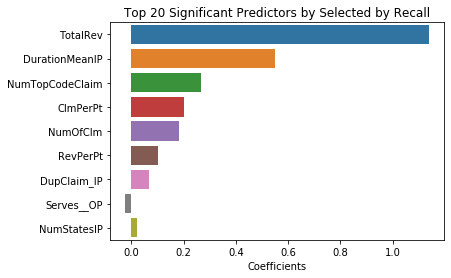

In [36]:
# Plot of Most Significant Coefs

plot_df = recall_coef_imp.iloc[:20, ]

ax = sns.barplot(y = plot_df.index, x = "coef", data = plot_df)
ax.set(xlabel = "Coefficients", title = "Top 20 Significant Predictors by Selected by Recall")

# plt.savefig("../output/lasso_coef_imp_top20.png", bbox_inches = "tight")

## Based on Accuracy Score

In [37]:
# Instantiate model

from sklearn.linear_model import LogisticRegression

logreg4 = LogisticRegression(class_weight='balanced')

In [38]:
# Gridsearch

from sklearn.model_selection import GridSearchCV

grid_logreg4 = {'penalty':['l1'], 
              'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_logreg4 = GridSearchCV(logreg4, grid_logreg4, scoring='recall', cv=5, n_jobs=-1)
%time grid_search_logreg4.fit(Xstrain, ytrain)

CPU times: user 86.4 ms, sys: 8.8 ms, total: 95.2 ms
Wall time: 13.5 s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [39]:
# grid_search_logreg.cv_results_

In [40]:
# Score

print('Best Parameters:\t'+ str(grid_search_logreg4.best_params_))
print('Best Accuracy Score:\t%.4f' %grid_search_logreg4.best_score_)
print("Train error:\t\t%.5f" % (1 - grid_search_logreg4.best_estimator_.score(Xstrain, ytrain)))

from sklearn.metrics import confusion_matrix

print('\nConfusion Matrix:')
print(confusion_matrix(ytrain, grid_search_logreg4.best_estimator_.predict(Xstrain)))

Best Parameters:	{'C': 0.01, 'penalty': 'l1'}
Best Accuracy Score:	0.8842
Train error:		0.14259

Confusion Matrix:
[[2930  503]
 [  37  317]]


In [41]:
cm = confusion_matrix(ytrain, grid_search_logreg4.best_estimator_.predict(Xstrain))

print('\nRecall:')
print(cm[1][1] / (cm[1][1]+cm[1][0]))
print('\nPrecision:')
print(cm[1][1] / (cm[1][1]+cm[0][1]))
print('\nAccuracy:')
print((cm[0][0]+cm[1][1]) / (cm[0][1]+cm[1][0]+cm[0][0]+cm[1][1]))


Recall:
0.8954802259887006

Precision:
0.38658536585365855

Accuracy:
0.85740691840507


In [43]:
# Feature Importance

acc_coef = pd.DataFrame(grid_search_logreg4.best_estimator_.coef_.flatten(), index = Xtrain.columns, columns = ['coefficient']).sort_values(by = 'coefficient', ascending = False)
acc_coef_abs = pd.DataFrame({'abs_coef':abs(grid_search_logreg4.best_estimator_.coef_.flatten()), 'coef': grid_search_logreg4.best_estimator_.coef_.flatten()}, index = Xtrain.columns).sort_values(by = 'abs_coef', ascending = False)
acc_coef_imp = acc_coef_abs[acc_coef_abs['abs_coef']>0]

print(f"number of predictors before Lasso:", acc_coef_abs.shape[0])
print(f"number of predictors after Lasso:", acc_coef_imp.shape[0])

display(acc_coef_abs)

number of predictors before Lasso: 45
number of predictors after Lasso: 9


,abs_coef,coef
TotalRev,1.140198,1.140198
DurationMeanIP,0.550896,0.550896
NumTopCodeClaim,0.266280,0.266280
ClmPerPt,0.202836,0.202836
NumOfClm,0.180586,0.180586
RevPerPt,0.100185,0.100185
DupClaim_IP,0.066064,0.066064
Serves__OP,0.024812,-0.024812
NumStatesIP,0.021747,0.021747
NumPtsIP,0.000000,0.000000


[Text(0.5, 0, 'Coefficients'),
 Text(0.5, 1.0, 'Top 20 Significant Predictors by Selected by Accuracy')]

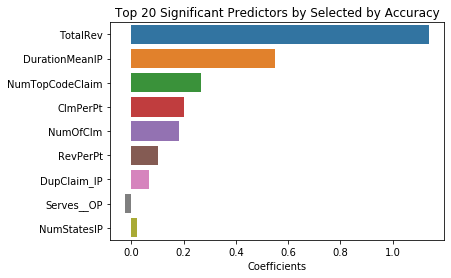

In [44]:
# Plot of Most Significant Coefs

plot_df = acc_coef_imp.iloc[:20, ]

ax = sns.barplot(y = plot_df.index, x = "coef", data = plot_df)
ax.set(xlabel = "Coefficients", title = "Top 20 Significant Predictors by Selected by Accuracy")

# plt.savefig("../output/lasso_coef_imp_top20.png", bbox_inches = "tight")